In [10]:
import numpy as np
import pandas as pd
import pandas_datareader as pdr
import seaborn as sns
import fix_yahoo_finance as fyf
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
forex = pdr.get_data_google()

In [3]:
forex = 'EURUSD=X USDJPY=X GBPUSD=X USDCAD=X USDCHF=X AUDUSD=X NZDUSD=X'
data2 = fyf.download(forex, start='2019-01-10')['Close']
data2.head()

[*********************100%***********************]  7 of 7 downloaded


,AUDUSD=X,EURUSD=X,GBPUSD=X,NZDUSD=X,USDCAD=X,USDCHF=X,USDJPY=X
Date,,,,,,,
2019-01-09,0.7163,1.1456,1.2738,0.6740,1.3247,0.9808,108.776
2019-01-10,0.7176,1.1555,1.2800,0.6791,1.3211,0.9740,108.189
2019-01-11,0.7187,1.1510,1.2754,0.6785,1.3239,0.9840,108.298
2019-01-14,0.7205,1.1460,1.2850,0.6822,1.3267,0.9837,108.458
2019-01-15,0.7199,1.1473,1.2875,0.6827,1.3276,0.9810,108.250


In [4]:
returns = pd.DataFrame()
for forex in data2:
    if forex not in returns:
        returns[forex] = np.log(data2[forex]).diff()
returns = returns[1:]
returns.head()

,AUDUSD=X,EURUSD=X,GBPUSD=X,NZDUSD=X,USDCAD=X,USDCHF=X,USDJPY=X
Date,,,,,,,
2019-01-10,0.001813,0.008605,0.004856,0.007538,-0.002721,-0.006957,-0.005411
2019-01-11,0.001532,-0.003902,-0.003600,-0.000884,0.002117,0.010215,0.001007
2019-01-14,0.002501,-0.004354,0.007499,0.005438,0.002113,-0.000305,0.001476
2019-01-15,-0.000833,0.001134,0.001944,0.000733,0.000678,-0.002749,-0.001920
2019-01-16,0.001249,-0.004893,-0.000233,-0.000440,-0.001206,0.006604,0.003633


In [8]:
corr = returns.corr()

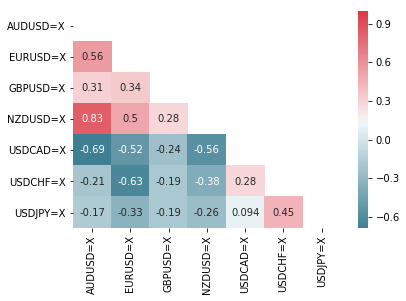

In [11]:
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, xticklabels=corr.columns, yticklabels=corr.columns, annot=True)

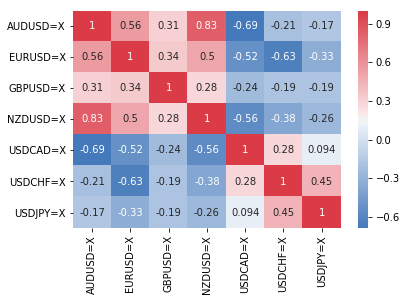

In [12]:
corr = returns.corr()
cmap = sns.diverging_palette(250, 10, as_cmap=True)
sns.heatmap(corr, cmap=cmap, xticklabels=corr.columns, yticklabels=corr.columns, annot=True)